# Model Building

In [15]:
#importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [16]:
#reading dataset
df=pd.read_csv('/Users/bibekrai/DS_salary/project building/data_after_eda.csv')

In [17]:
df.drop(columns="Unnamed: 0",inplace=True)

In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly_salary', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'state', 'job_state', 'age', 'python', 'R',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'job_desc_length',
       'num_comp'],
      dtype='object')

In [19]:
df_model=df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly_salary','max_salary','employer_provided_salary','job_state','state','age','python','spark','aws','excel','job_simp','seniority','job_desc_length']]

In [20]:
#getting dummies values

df_dum=pd.get_dummies(df_model)

In [21]:
df_dum.columns

Index(['avg_salary', 'Rating', 'num_comp', 'hourly_salary', 'max_salary',
       'employer_provided_salary', 'state', 'age', 'python', 'spark',
       ...
       'job_simp_analyst', 'job_simp_data engineer', 'job_simp_data scientist',
       'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na',
       'seniority_jr', 'seniority_na', 'seniority_senior'],
      dtype='object', length=179)

In [22]:
#importing ml libraries
import sklearn as sks

In [23]:
#chossing variables
x=df_dum.drop('avg_salary',axis=1)
y=df_dum.max_salary.values

In [24]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
#stat_model

#documentation - https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

X_sm = x = sm.add_constant(x)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.665e+28
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:58:10   Log-Likelihood:                 20079.
No. Observations:                 742   AIC:                        -3.987e+04
Df Residuals:                     598   BIC:                        -3.921e+04
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              8.674e-13   1.43e-13      6.070      0.000    5.87e-13    1.15e-12
Rating                                            -4.005e-13   3.96e-14    -10.108      0.000   -4.78e-13   -3.23e-13
num_comp                                           3.793e-14   1.78e-14      2.131      0.034    2.97e-15    7.29e-14
hourly_salary                                     -3.717e-14   1.88e-13     -0.198      0.843   -4.06e-13    3.32e-13
max_salary                                            1.0000   6.82e-16   1.47e+15      0.000       1.000       1.000
employer_provided_salary                           -1.88e-13   2.35e-13     -0.799      0.424    -6.5e-13    2.74e-13
state                                              6.789e-14   5.34e-14      1.270      0.204   -3.71e-14    1.73e-13
age                                                8.598e-16   6.12e-16      1.404      0.161   -3.43e-16    2.06e-15
python                                            -3.228e-14   5.18e-14     -0.623      0.534   -1.34e-13    6.95e-14
spark                                              2.935e-14   5.96e-14      0.493      0.622   -8.76e-14    1.46e-13
aws                                                 1.13e-13   5.58e-14      2.024      0.043    3.38e-15    2.23e-13
excel                                              8.543e-14   4.63e-14      1.847      0.065   -5.41e-15    1.76e-13
job_desc_length                                    -2.63e-17   1.55e-17     -1.694      0.091   -5.68e-17    4.19e-18
Size_-1                                            7.318e-14   1.76e-13      0.415      0.678   -2.73e-13     4.2e-13
Size_1 to 50 employees                             1.769e-13   1.33e-13      1.334      0.183   -8.36e-14    4.37e-13
Size_10000+ employees                              5.378e-14   1.18e-13      0.454      0.650   -1.79e-13    2.86e-13
Size_1001 to 5000 employees                        6.248e-14   7.93e-14      0.788      0.431   -9.33e-14    2.18e-13
Size_201 to 500 employees                          1.321e-13   7.91e-14      1.670      0.095   -2.33e-14    2.87e-13
Size_5001 to 10000 employees                       6.339e-14   1.11e-13      0.571      0.568   -1.55e-13    2.81e-13
Size_501 to 1000 employees                         1.066e-13   8.28e-14      1.286      0.199   -5.61e-14    2.69e-13
Size_51 to 200 employees                           9.695e-14   9.02e-14      1.074      0.283   -8.03e-14    2.74e-13
Size_Unknown                                       1.013e-13   2.86e-13      0.354      0.723    -4.6e-13    6.63e-13
Type of ownership_-1                               8.025e-14   1.76e-13      0.455      0.649   -2.66e-13    4.27e-13
Type of ownersh

In [27]:
#multiple_linear_regression

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

np.mean(cross_val_score(lr,X_train,y_train, scoring = 'neg_mean_absolute_error',cv=2))

-2.4948698631221924e-13

,alpha,error
0,0.01,-0.000273


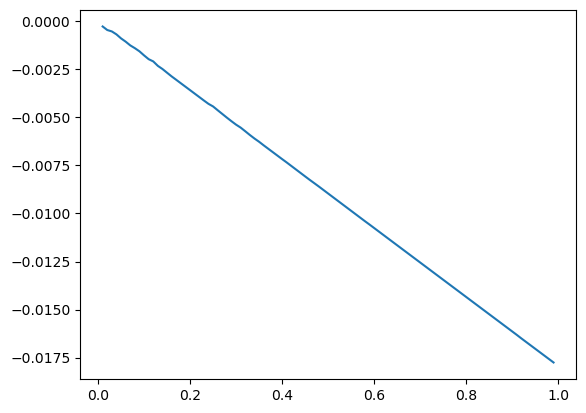

In [38]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [47]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-0.7347574732092502

In [53]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('friedman_mse',), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_


/Users/bibekrai/tensorflow-test/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/bibekrai/tensorflow-test/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/bibekrai/tensorflow-test/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remov

RandomForestRegressor(criterion='friedman_mse', max_features='auto',
                      n_estimators=140)

In [54]:
# test ensembles 
tpred_lm = lr.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])


/Users/bibekrai/tensorflow-test/env/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[3.6,
 0.0,
 0.0,
 62.0,
 0.0,
 1.0,
 37.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,